In [2]:
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import epitopepredict as ep
from epitopepredict import base, sequtils, analysis, plotting
from mhcflurry import Class1AffinityPredictor

This code is used to analyzed data from NetTepi

In [3]:
dfpep1=pd.read_csv("COVID_peptides.csv")

In [5]:
dfpep_all=pd.read_csv("All_COVID_peptides.csv")

In [8]:
dftepi=pd.read_csv("../DATA/16969_NetTepi_out-covid.csv",sep='\t')

In [9]:
dfbase=dftepi.drop(dftepi.iloc[:,3:82], axis=1)
dfrest=dftepi.drop(dftepi.iloc[:,0:3], axis=1)
imin=0    
imax=6
dfadd=dfrest.iloc[:,imin:imax]
dfadd.columns = ['Allele','Aff','Stab','Tcell','Comb','Rank']
df_tot=dfbase.join(dfadd)
for i in range(1,13):
    imin=i*6
    imax=(i+1)*6
    dfadd=dfrest.iloc[:,imin:imax]
    dfadd.columns = ['Allele','Aff','Stab','Tcell','Comb','Rank']
    dfadd2=dfbase.join(dfadd)
    frames = [df_tot, dfadd2]
    df_tot=pd.concat(frames)

In [10]:
df_tot['Allele'] = df_tot['Allele'].astype(str)

In [11]:
df_tot['Allele']= df_tot['Allele'].str[:5]+"*"+df_tot['Allele'].str[5:]

In [12]:
df_tot=df_tot.rename(columns={"Peptide":"peptide","Allele":"allele"})

,Pos,peptide,Identity,allele,Aff,Stab,Tcell,Comb,Rank
0,0,MYSFVSEE,QHD43418__envel,HLA-A*01:01,0.051,0.009,0.021,0.041,50.0
1,1,YSFVSEET,QHD43418__envel,HLA-A*01:01,0.079,0.012,0.072,0.068,32.0
2,2,SFVSEETG,QHD43418__envel,HLA-A*01:01,0.041,0.006,0.057,0.037,50.0
3,3,FVSEETGT,QHD43418__envel,HLA-A*01:01,0.070,0.010,0.198,0.073,20.0
4,4,VSEETGTL,QHD43418__envel,HLA-A*01:01,0.143,0.014,0.225,0.131,5.0
...,...,...,...,...,...,...,...,...,...
7815,1258,DDSEPVLKGVK,QHD43416__surfa,HLA-B*58:01,0.036,0.003,-0.041,0.023,50.0
7816,1259,DSEPVLKGVKL,QHD43416__surfa,HLA-B*58:01,0.066,0.013,-0.150,0.036,50.0
7817,1260,SEPVLKGVKLH,QHD43416__surfa,HLA-B*58:01,0.037,0.003,-0.197,0.008,50.0
7818,1261,EPVLKGVKLHY,QHD43416__surfa,HLA-B*58:01,0.050,0.007,-0.202,0.018,50.0


In [14]:
binders=dfpep1[["peptide","allele"]]

In [22]:
both=pd.merge(df_tot, dfpep1, on=['peptide','allele'],how="left")

In [25]:
both=both.dropna()

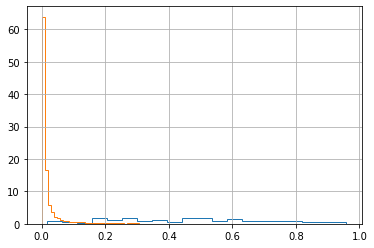

In [41]:
%matplotlib inline
both.Stab.hist(density=True, bins=20, histtype='step')
df_tot.Stab.hist(density=True,bins=100, histtype='step')

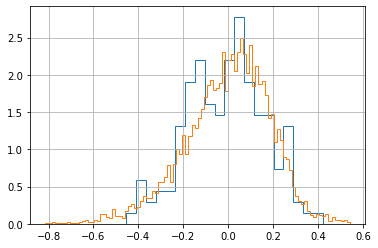

In [40]:
%matplotlib inline
both.Tcell.hist(density=True, bins=20, histtype='step')
df_tot.Tcell.hist(density=True,bins=100, histtype='step')

In [102]:
my_order

Index(['HLA-B*40:01', 'HLA-A*02:01', 'HLA-A*24:02', 'HLA-B*07:02',
       'HLA-A*26:01', 'HLA-B*58:01', 'HLA-B*35:01', 'HLA-B*15:01',
       'HLA-A*03:01', 'HLA-A*11:01', 'HLA-B*39:01', 'HLA-A*01:01',
       'HLA-B*27:05'],
      dtype='object', name='allele')

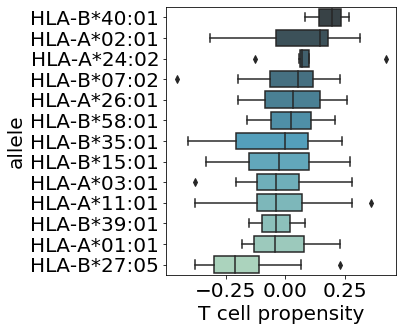

In [138]:
%matplotlib inline
plt.rcParams.update({'font.size': 20})
my_order = both.groupby(by=["allele"])["Tcell"].median().sort_values().iloc[::-1].index
ax=sns.boxplot(data=both, y="allele", x="Tcell", palette="GnBu_d", order=my_order)
ax.set_xlabel("T cell propensity")
ax = plt.gcf()
ax.set_size_inches(6, 5)
plt.tight_layout()
filename="../FIGURES/Tcell-prop.png"
plt.savefig(filename, dpi=150)

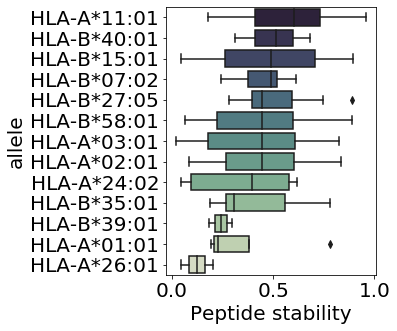

In [139]:
%matplotlib inline
plt.rcParams.update({'font.size': 20})
cmap=sns.cubehelix_palette(13, start=0.5, rot=-0.75, reverse=True)
my_order = both.groupby(by=["allele"])["Stab"].median().sort_values().iloc[::-1].index
ax=sns.boxplot(data=both, y="allele", x="Stab", palette=cmap, order=my_order)
ax.set_xlabel("Peptide stability")
ax = plt.gcf()
ax.set_size_inches(6, 5)
plt.tight_layout()
filename="../FIGURES/Pep-Stab.png"
plt.savefig(filename, dpi=150)

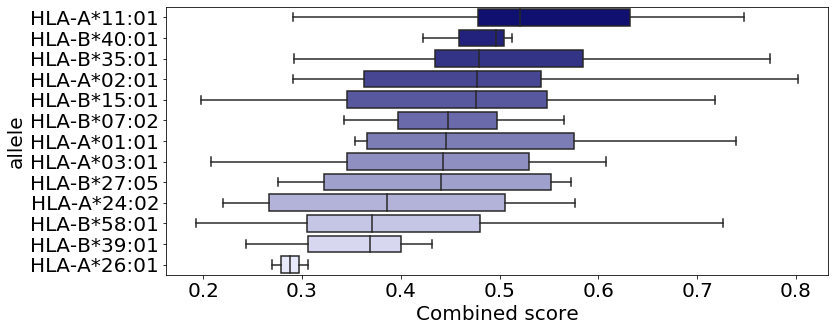

In [141]:
%matplotlib inline
plt.rcParams.update({'font.size': 20})
#cmap=sns.cubehelix_palette(13, start=0.5, rot=-0.75, reverse=True)
cmap=sns.light_palette("navy",n_colors=13, reverse="True")
my_order = both.groupby(by=["allele"])["Comb"].median().sort_values().iloc[::-1].index
ax=sns.boxplot(data=both, y="allele", x="Comb", palette=cmap, order=my_order)
ax.set_xlabel("Combined score")
ax = plt.gcf()
ax.set_size_inches(12, 5)
plt.tight_layout()
filename="../FIGURES/Score.png"
plt.savefig(filename, dpi=150)

In [70]:
len(both.peptide.unique())

131

In [71]:
len(dfpep1.peptide.unique())

331

In [72]:
len(dfpep1.peptide)

641

In [74]:
len(df_tot.peptide.unique())

7820

In [77]:
len(df_tot.peptide)

101660

In [78]:
len(dfpep_all.peptide)

136229

In [79]:
len(dfpep_all.peptide.unique())

2437

In [143]:
both

,Pos,peptide,Identity,allele,Aff,Stab,Tcell,Comb,Rank,Unnamed: 0,prediction,prediction2,log(p1),log(p2),deltap,K_tot,Min,Max,IC50
651,170,ATSRTLSYY,QHD43419__membr,HLA-A*01:01,0.679,0.190,-0.116,0.521,0.12,12403.0,62.909985,62.3738,4.141705,4.133145,0.004280,0.015964,0.016032,0.015896,62.641892
2045,102,DLSPRWYFYY,QHD43423__nucle,HLA-A*01:01,0.401,0.213,0.228,0.354,0.50,27334.0,531.652829,418.3470,6.275991,6.036311,0.119269,0.002105,0.002390,0.001881,474.999914
4892,864,LTDEMIAQY,QHD43416__surfa,HLA-A*01:01,0.826,0.780,0.028,0.739,0.03,97170.0,7.439322,5.4236,2.006780,1.690760,0.156708,0.155486,0.184379,0.134421,6.431461
7553,996,ITGRLQSLQTY,QHD43416__surfa,HLA-A*01:01,0.472,0.245,-0.180,0.370,0.40,67545.0,740.612593,960.2094,6.607478,6.867151,0.129112,0.001176,0.001350,0.001041,850.410996
7907,19,FLAFVVFLL,QHD43418__envel,HLA-A*02:01,0.863,0.833,0.302,0.802,0.05,39580.0,5.319209,6.6840,1.671325,1.899717,0.113702,0.166622,0.187998,0.149611,6.001604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99293,160,SSANNCTFEY,QHD43416__surfa,HLA-B*58:01,0.384,0.510,0.114,0.377,2.00,158937.0,354.088532,501.1602,5.869547,6.216926,0.171964,0.002339,0.002824,0.001995,427.624366
99436,303,KSFTVEKGIY,QHD43416__surfa,HLA-B*58:01,0.485,0.599,0.109,0.466,1.50,77725.0,105.212022,123.7755,4.655978,4.818469,0.081068,0.008734,0.009505,0.008079,114.493761
100009,876,LLAGTITSGW,QHD43416__surfa,HLA-B*58:01,0.504,0.599,0.115,0.480,1.00,85941.0,26.284302,35.0397,3.268972,3.556482,0.142773,0.032614,0.038046,0.028539,30.662001
100182,1049,MSFPQSAPHG,QHD43416__surfa,HLA-B*58:01,0.241,0.192,-0.160,0.193,7.00,101425.0,932.791150,746.0645,6.838181,6.614812,0.111223,0.001191,0.001340,0.001072,839.427825


In [151]:
allele_max=both.groupby(by=["allele"]).max().sort_values(by="Tcell",ascending=False)

In [152]:
allele_max

,Pos,peptide,Identity,Aff,Stab,Tcell,Comb,Rank,Unnamed: 0,prediction,prediction2,log(p1),log(p2),deltap,K_tot,Min,Max,IC50
allele,,,,,,,,,,,,,,,,,,
HLA-A*24:02,1209,VFKNIDGYF,QHD43419__membr,0.641,0.616,0.421,0.576,4.0,176186.0,736.406073,902.5843,6.601782,6.805262,0.232628,0.022660,0.023840,0.021592,819.495187
HLA-A*11:01,1064,VTYVPAQEK,QHD43423__nucle,0.810,0.959,0.359,0.747,4.0,182820.0,685.912234,921.7897,6.530750,6.826317,0.221257,0.160545,0.183564,0.142656,803.850967
HLA-A*02:01,1216,YVYSRVKNL,QHD43419__membr,0.863,0.833,0.312,0.802,6.0,191971.0,871.780248,890.6709,6.770537,6.791975,0.241597,0.166622,0.187998,0.149611,865.512424
HLA-A*03:01,1064,VTYVPAQEK,QHD43423__nucle,0.663,0.826,0.281,0.608,4.0,182819.0,999.260165,753.1122,6.907015,6.624214,0.238098,0.056419,0.057778,0.055122,851.518533
HLA-B*15:01,916,YVGYLQPRTF,QHD43423__nucle,0.785,0.892,0.274,0.718,9.0,191772.0,847.399995,873.9651,6.742173,6.773040,0.249269,0.089484,0.090732,0.088271,787.536683
HLA-B*40:01,1070,QEKNFTTAPAI,QHD43419__membr,0.533,0.681,0.269,0.513,1.5,126377.0,694.242477,575.8524,6.542821,6.355851,0.220306,0.003114,0.003923,0.002582,635.047439
HLA-A*26:01,894,QIPFAMQMAY,QHD43423__nucle,0.369,0.200,0.259,0.306,1.5,128473.0,509.916140,516.0781,6.234246,6.246258,0.159456,0.002319,0.002758,0.002000,512.997120
HLA-B*35:01,1049,YSSANNCTF,QHD43423__nucle,0.877,0.781,0.240,0.774,5.0,191072.0,944.785486,962.7579,6.850958,6.869802,0.226023,0.128342,0.140532,0.118098,953.771693
HLA-B*27:05,683,YRLFRKSNLK,QHD43423__nucle,0.649,0.891,0.232,0.572,3.0,189885.0,994.595055,872.4064,6.902336,6.771255,0.239751,0.039098,0.040157,0.038093,933.500728
